In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
# 1. Load the data
data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv', index_col=0)
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv', index_col=0)

In [9]:
# 2. Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    data,
    labels,
    test_size=0.25,
    random_state=42,
    stratify=labels  # This ensures class balance is maintained
)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/data.shape[0]*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/data.shape[0]*100:.1f}%)")
print(f"\nTraining set label proportions:\n{y_train['Class'].value_counts(normalize=True)}")
print(f"\nTesting set label proportions:\n{y_test['Class'].value_counts(normalize=True)}")

Training set size: 600 samples (74.9%)
Testing set size: 201 samples (25.1%)

Training set label proportions:
Class
BRCA    0.375000
KIRC    0.181667
LUAD    0.176667
PRAD    0.170000
COAD    0.096667
Name: proportion, dtype: float64

Testing set label proportions:
Class
BRCA    0.373134
KIRC    0.184080
LUAD    0.174129
PRAD    0.169154
COAD    0.099502
Name: proportion, dtype: float64


In [10]:
# 3.Train a LogisticRegression classifier 
clf = LogisticRegression(max_iter=1000, random_state=42, verbose=1)
clf.fit(X_train, y_train.values.ravel())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       102660     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60944D+00    |proj g|=  3.20010D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     27     31      1     0     0   9.542D-05   1.451D-04
  F =   1.4508293466468863E-004

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
# 4. Evaluate the accuracy on the test set
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Accuracy: 0.9900 (99.00%)


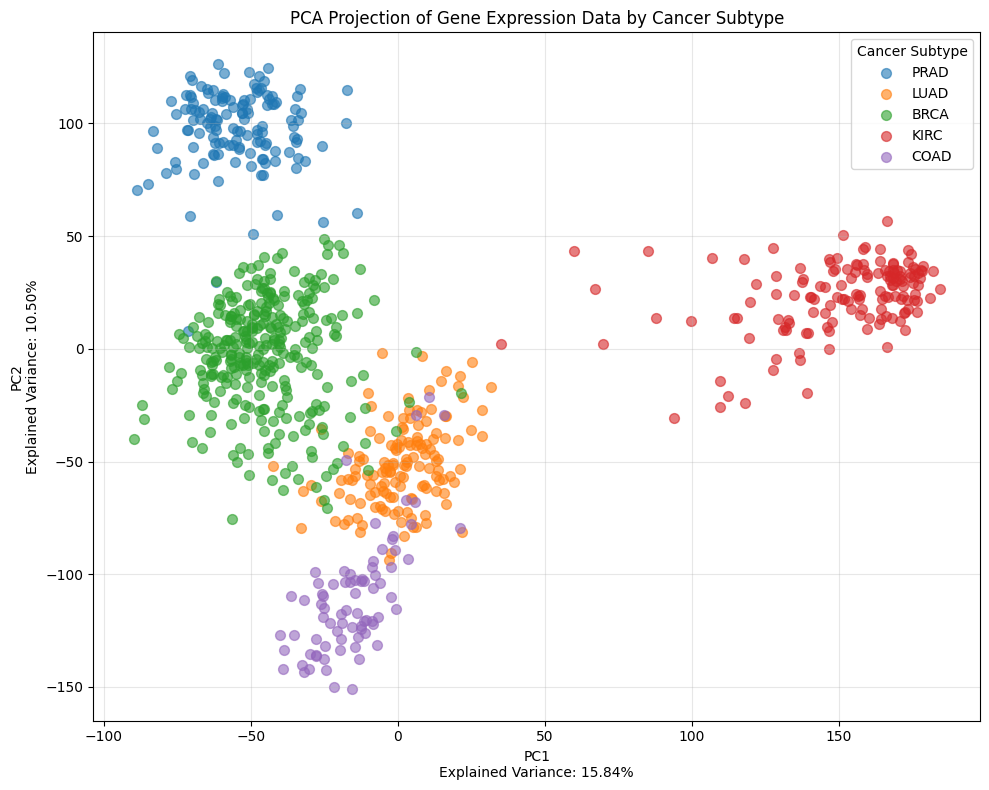


Total variance explained by 2 components: 26.34%


In [13]:
# 5. PCA dimensionality reduction and visualization


pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
cancer_types = labels['Class'].unique()
colors = plt.cm.tab10(range(len(cancer_types)))

for i, cancer_type in enumerate(cancer_types):
    mask = labels['Class'] == cancer_type
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], 
                c=[colors[i]], label=cancer_type, alpha=0.6, s=50)

plt.xlabel(f'PC1\nExplained Variance: {pca.explained_variance_ratio_[0]:.2%}')
plt.ylabel(f'PC2\nExplained Variance: {pca.explained_variance_ratio_[1]:.2%}')
plt.title('PCA Projection of Gene Expression Data by Cancer Subtype')
plt.legend(title='Cancer Subtype')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal variance explained by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

Does this visualization support the idea that the two subtypes are linearly separable based on their gene expression profiles?


Yes, the data suggests that the cancer subtypes are linearly separable: The five subtypes (PRAD, LUAD, BRCA, KIRC, COAD) form distinct, isolated "islands" or clusters on the plot.  Here is visible white space separating each group from its neighbors. Because of these clear gaps, you could draw a straight line (a linear decision boundary) between any pair of these subtypes to separate them with high accuracy.